In [ ]:
conda install -y -c conda-forge plotnine

# Visualization of datasets in Python

- matplotlib
    - matplotlib.org/gallery
- plotnine
- pandas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
surveys = pd.read_csv('../data/surveys.csv')

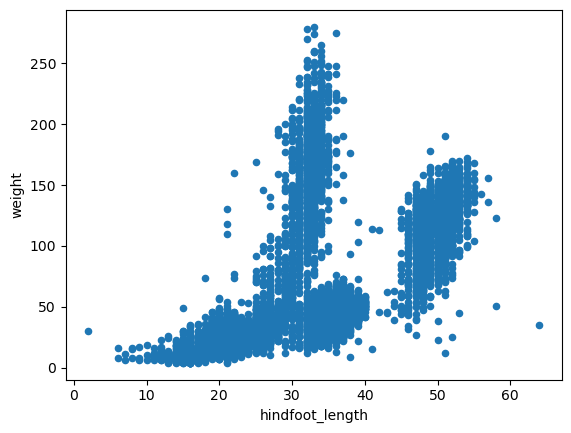

In [4]:
my_plot = surveys.plot('hindfoot_length', 'weight', kind='scatter')
#plt.show()

## matplotlib

In [5]:
import numpy as np

In [6]:
# create a normal distribution
sample_data = np.random.normal(0, 0.1, 1000)

(array([  5.,  21.,  83., 176., 251., 236., 159.,  52.,  13.,   4.]),
 array([-0.32353658, -0.25693857, -0.19034057, -0.12374256, -0.05714456,
         0.00945345,  0.07605146,  0.14264946,  0.20924747,  0.27584547,
         0.34244348]),
 <BarContainer object of 10 artists>)

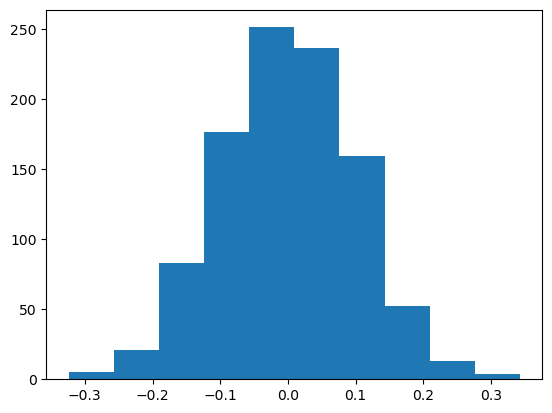

In [8]:
# create a histogram
plt.hist(sample_data)

(array([  5.,  21.,  83., 176., 251., 236., 159.,  52.,  13.,   4.]),
 array([-0.32353658, -0.25693857, -0.19034057, -0.12374256, -0.05714456,
         0.00945345,  0.07605146,  0.14264946,  0.20924747,  0.27584547,
         0.34244348]),
 <BarContainer object of 10 artists>)

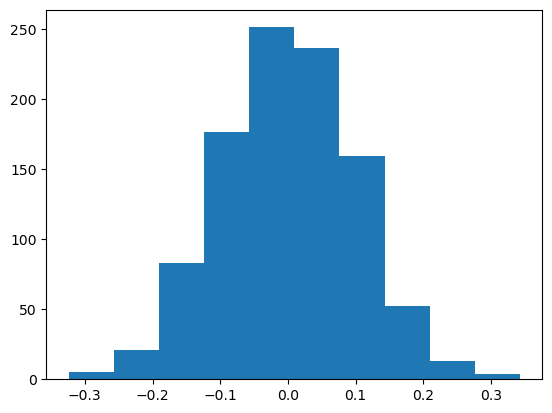

In [10]:
# figure, axes
fig, ax = plt.subplots()
ax.hist(sample_data)

In [13]:
beta = np.random.beta(5, 10, 1000)

fig, ax1 = plt.subplots()

ax1.hist(sample_data)
ax1.set_xlabel('value')

ax2 = fig.add_axes([0.125, 0.575, 0.3, 0.3])
ax2.hist(beta)

## Plotnine

### Grammar of Graphics

In [17]:
import plotnine as p9
import pandas as pd

In [18]:
surveys_cp = pd.read_csv('../data/surveys.csv')
surveys_cp = surveys_cp.dropna()

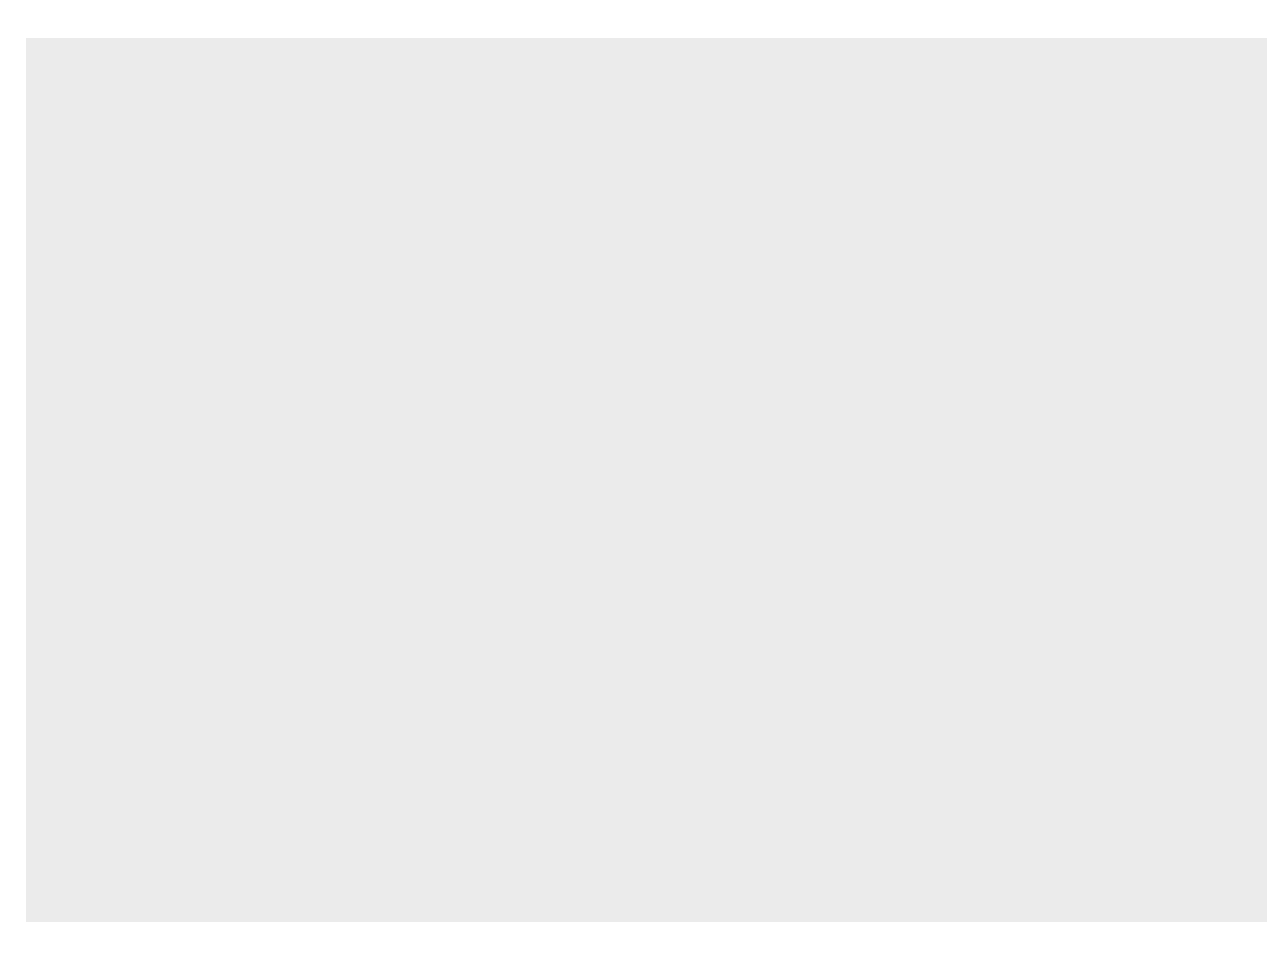

<Figure Size: (640 x 480)>

In [20]:
(
    p9.ggplot(data=surveys_cp)
)

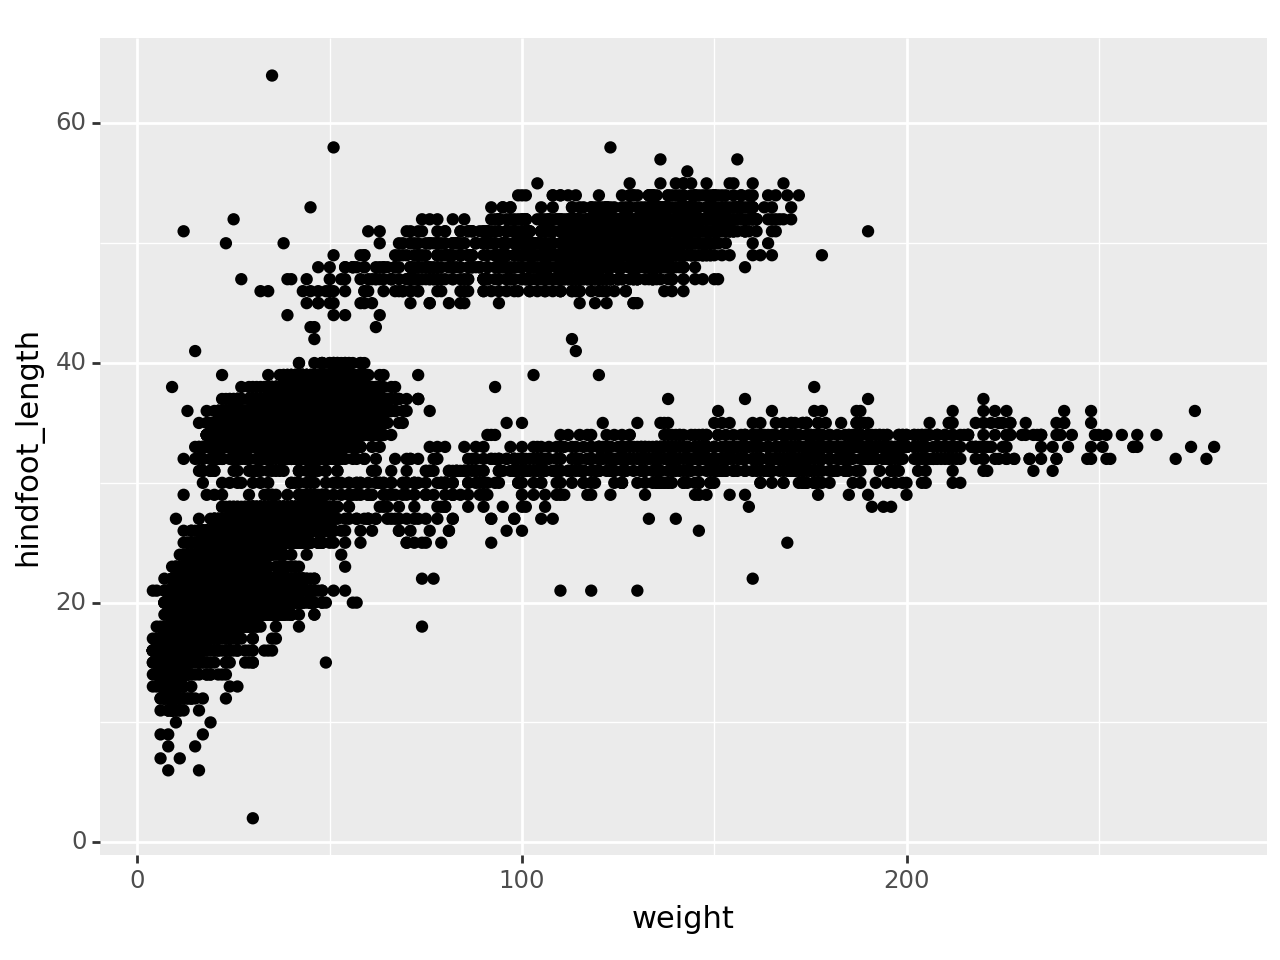

<Figure Size: (640 x 480)>

In [23]:
(
    p9.ggplot(data=surveys_cp, mapping=p9.aes(x='weight', y='hindfoot_length'))
    # adding geometry
    + p9.geom_point()
)

In [24]:
surveys_plot = p9.ggplot(data=surveys_cp, mapping=p9.aes(x='weight', y='hindfoot_length'))

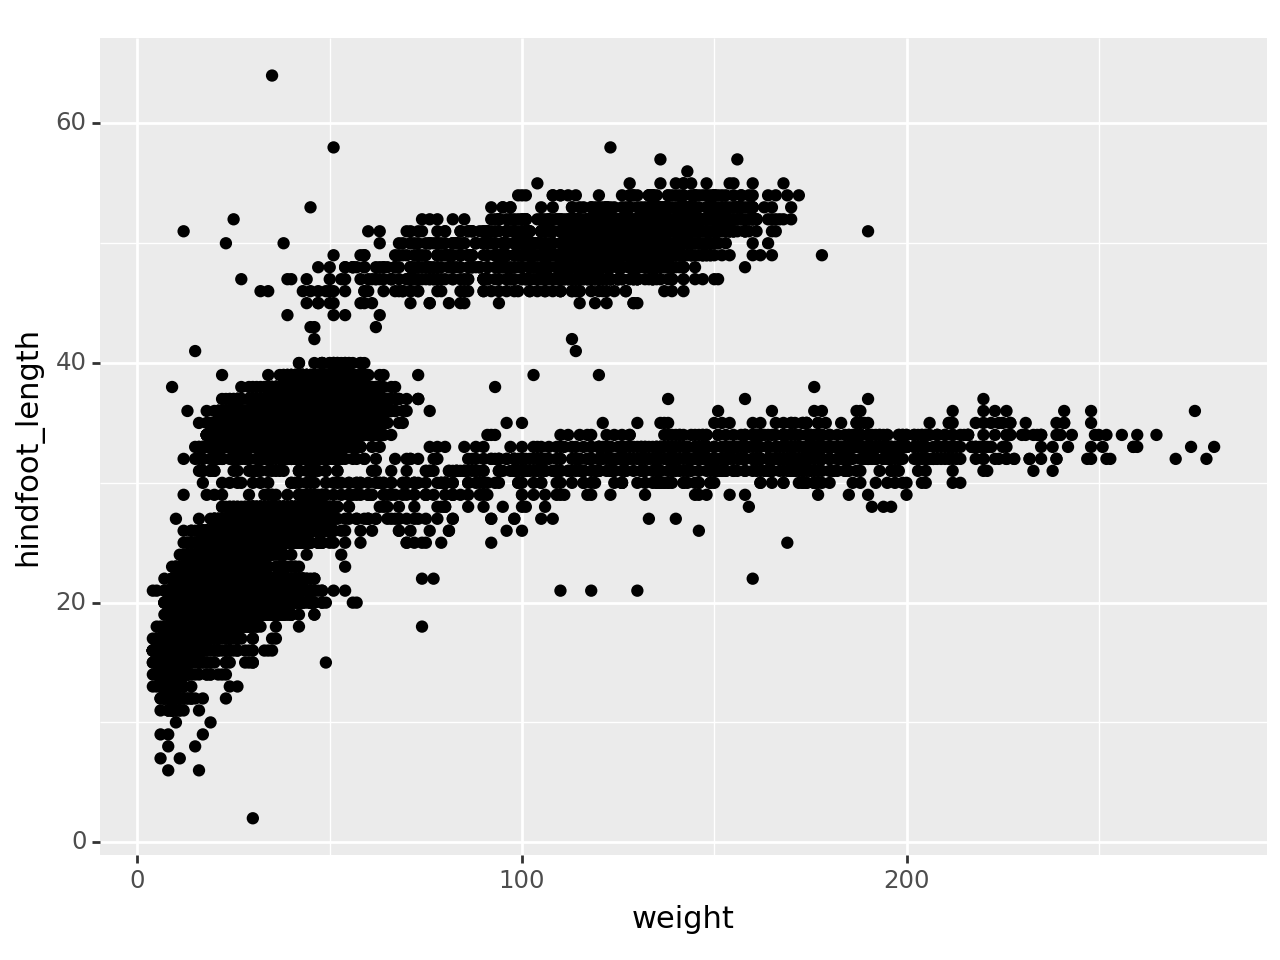

<Figure Size: (640 x 480)>

In [25]:
surveys_plot + p9.geom_point()

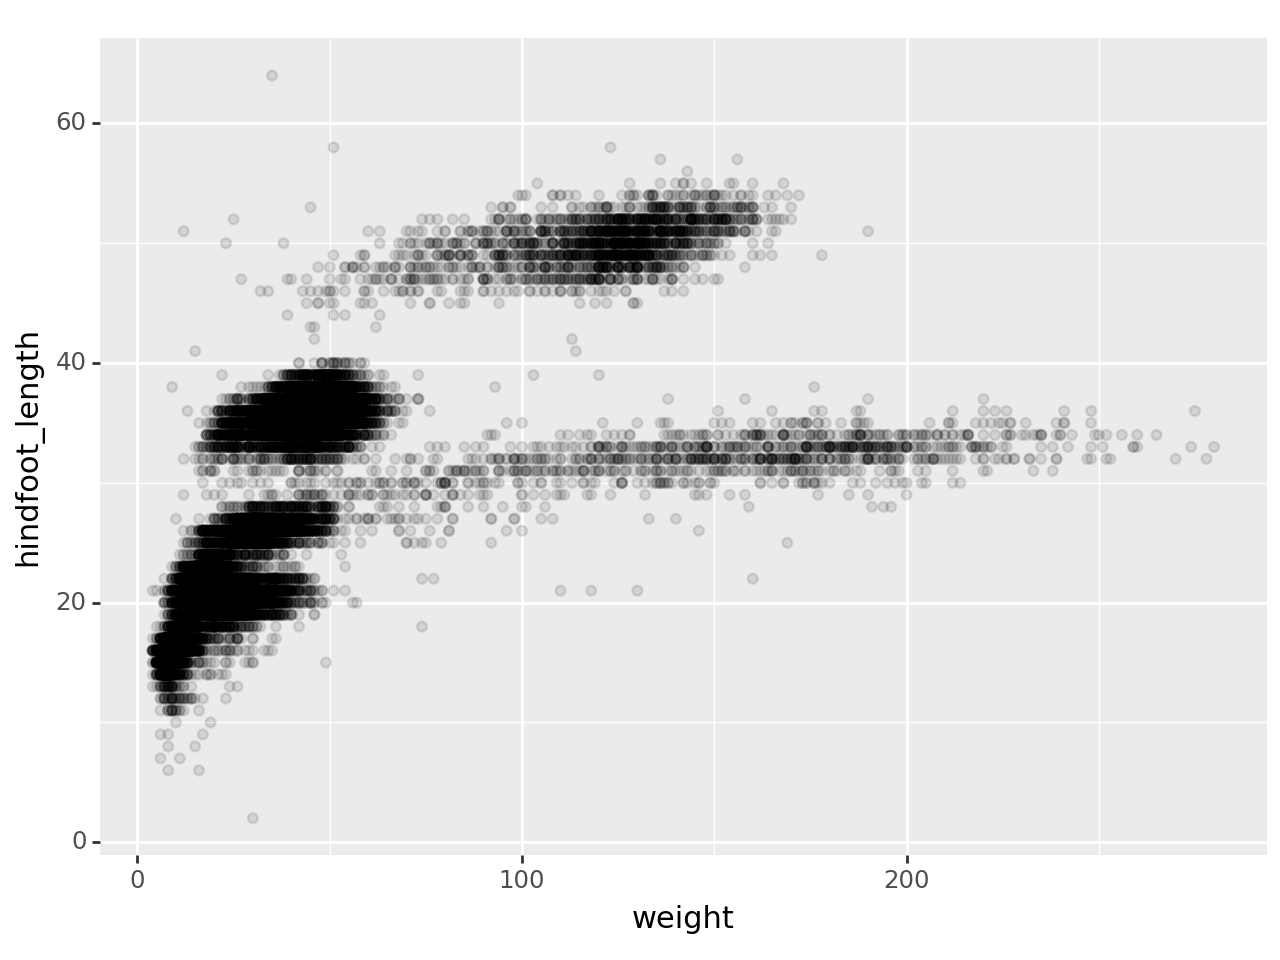

<Figure Size: (640 x 480)>

In [26]:
surveys_plot + p9.geom_point(alpha=0.1)

+ p9.xlab('Weight (g)')
+ p9.ylab('')
+ p9.scale_x_log10()
+ p9.theme_bw()

## Time series

In [27]:
yearly_counts = surveys_cp.groupby(['year', 'species_id'])['species_id'].count()

In [28]:
yearly_counts

year  species_id
1977  DM            181
      DO             12
      DS             29
      OL              1
      OX              2
                   ... 
2002  PP            375
      RM             20
      RO              7
      SF              5
      SH              9
Name: species_id, Length: 332, dtype: int64

In [29]:
yearly_counts = yearly_counts.reset_index(name='counts')

In [30]:
yearly_counts

,year,species_id,counts
0,1977,DM,181
1,1977,DO,12
2,1977,DS,29
3,1977,OL,1
4,1977,OX,2
...,...,...,...
327,2002,PP,375
328,2002,RM,20
329,2002,RO,7
330,2002,SF,5


In [ ]:
# counts by year (x axis), line with different color per species (feature mapping)
# geom_point, geom_

In [ ]:
(
    p9.ggplot(data=yearly_counts,
              mapping=p9.aes(x='year', y='counts', color='species_id'))
)